# Model Evaluation Tutorial 

## Section 1

The first part of this tutorial describes a python algorithm/script that is used to compare observed and modelled datasets. The user provides two arrays (i.e. obs and sim) and an estimate of the uncertainty around the observed data (constant) to the comparison function. When called by the user the function performs the comparison and returns a summary statistic. 

The following block of code creates the sim_vs_obs comparison functions. The first function is named "compare" and the second "compare_daily"

In [4]:
%load_ext watermark
%watermark -v -m -p pandas,numpy,matplotlib

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
CPython 2.7.15
IPython 5.8.0

pandas 0.24.2
numpy 1.16.6
matplotlib 2.2.3

compiler   : GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 19.3.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit


In [1]:
def compare(sim, obs, unctype, unc) :
		
	import pandas as pd
	import numpy as np

	sim = np.array(sim)
	obs = np.array(obs)
	
	fit = pd.DataFrame(columns=['oneorzero','obsday'])

	if (unctype == 'pc') : 

		for ct in range(len(sim)):

			if ( np.isnan(obs[ct]) ) : continue 

			if ( (obs[ct] >= 0) and (obs[ct]*(1-unc) <= sim[ct] <= obs[ct]*(1+unc)) ) :
				 fit = fit.append({'oneorzero':1,'obsday':ct},ignore_index=True)
				 continue

			if ( (obs[ct] < 0) and (obs[ct]*(1-unc) >= sim[ct] >= obs[ct]*(1+unc)) ) :
				 fit = fit.append({'oneorzero':1,'obsday':ct},ignore_index=True)
				 continue

			if (ct not in [0,1,2,3,len(sim)-3,len(sim)-2,len(sim)-1,len(sim)]) and (obs[ct] >= 0) and \
				 (      ( obs[ct]*(1-unc) <= sim[ct+1] <= obs[ct]*(1+unc) )  
					 or ( obs[ct]*(1-unc) <= sim[ct+2] <= obs[ct]*(1+unc) )  
					 or ( obs[ct]*(1-unc) <= sim[ct+3] <= obs[ct]*(1+unc) )  
					 or ( obs[ct]*(1-unc) <= sim[ct-1] <= obs[ct]*(1+unc) )
					 or ( obs[ct]*(1-unc) <= sim[ct-2] <= obs[ct]*(1+unc) ) 
					 or ( obs[ct]*(1-unc) <= sim[ct-3] <= obs[ct]*(1+unc) ) ):
				 fit = fit.append({'oneorzero':1,'obsday':ct},ignore_index=True)
				 continue  

			if (ct not in [0,1,2,3,len(sim)-3,len(sim)-2,len(sim)-1,len(sim)]) and (obs[ct] < 0) and \
				 (      ( obs[ct]*(1-unc) >= sim[ct+1] >= obs[ct]*(1+unc) )  
					 or ( obs[ct]*(1-unc) >= sim[ct+2] >= obs[ct]*(1+unc) )  
					 or ( obs[ct]*(1-unc) >= sim[ct+3] >= obs[ct]*(1+unc) )  
					 or ( obs[ct]*(1-unc) >= sim[ct-1] >= obs[ct]*(1+unc) )
					 or ( obs[ct]*(1-unc) >= sim[ct-2] >= obs[ct]*(1+unc) ) 
					 or ( obs[ct]*(1-unc) >= sim[ct-3] >= obs[ct]*(1+unc) ) ):
				 fit = fit.append({'oneorzero':1,'obsday':ct},ignore_index=True)
				 continue 

			fit = fit.append({'oneorzero':0,'obsday':ct},ignore_index=True)

	
	if (unctype == 'qt') : 

		for ct in range(len(sim)):

			if ( np.isnan(obs[ct]) ) : continue 

			if ( (obs[ct] >= 0) and (obs[ct]-unc <= sim[ct] <= obs[ct]+unc) ) :
				 fit = fit.append({'oneorzero':1,'obsday':ct},ignore_index=True)
				 continue

			if ( (obs[ct] < 0) and (obs[ct]+unc >= sim[ct] >= obs[ct]-unc) ) :
				 fit = fit.append({'oneorzero':1,'obsday':ct},ignore_index=True)
				 continue

			if (ct not in [0,1,2,3,len(sim)-3,len(sim)-2,len(sim)-1,len(sim)]) and (obs[ct] >= 0) and \
				 (      ( obs[ct]-unc <= sim[ct+1] <= obs[ct]+unc )  
					 or ( obs[ct]-unc <= sim[ct+2] <= obs[ct]+unc )  
					 or ( obs[ct]-unc <= sim[ct+3] <= obs[ct]+unc )  
					 or ( obs[ct]-unc <= sim[ct-1] <= obs[ct]+unc )
					 or ( obs[ct]-unc <= sim[ct-2] <= obs[ct]+unc ) 
					 or ( obs[ct]-unc <= sim[ct-3] <= obs[ct]+unc ) ):
				 fit = fit.append({'oneorzero':1,'obsday':ct},ignore_index=True)
				 continue  

			if (ct not in [0,1,2,3,len(sim)-3,len(sim)-2,len(sim)-1,len(sim)]) and (obs[ct] < 0) and \
				 (      ( obs[ct]+unc >=  sim[ct+1] >= obs[ct]-unc )  
					 or ( obs[ct]+unc >=  sim[ct+2] >= obs[ct]-unc )  
					 or ( obs[ct]+unc >=  sim[ct+3] >= obs[ct]-unc )  
					 or ( obs[ct]+unc >=  sim[ct-1] >= obs[ct]-unc )
					 or ( obs[ct]+unc >=  sim[ct-2] >= obs[ct]-unc ) 
					 or ( obs[ct]+unc >=  sim[ct-3] >= obs[ct]-unc ) ):
				 fit = fit.append({'oneorzero':1,'obsday':ct},ignore_index=True)
				 continue 

			fit = fit.append({'oneorzero':0,'obsday':ct},ignore_index=True)


	return round(float(sum(fit.oneorzero))/float(len(fit)), 4)


# same-day-only comparison
# sim/obs : simulated and observed data
# unctype/unc : type of uncertainty info values (amount or %) and uncertainty info
def compare_daily(sim, obs, unctype, unc) :
	
	import pandas as pd
	import numpy as np

	fit = pd.DataFrame(columns=['oneorzero','obsday'])

	if (unctype == 'pc' ) : 	

		for ct in range(len(sim)):

			if ( np.isnan(obs[ct]) ) : continue 

			if ( (obs[ct] >= 0) and (obs[ct]*(1-unc) <= sim[ct] <= obs[ct]*(1+unc)) ) :
				 fit = fit.append({'oneorzero':1,'obsday':ct},ignore_index=True)
				 continue

			if ( (obs[ct] < 0) and (obs[ct]*(1-unc) >= sim[ct] >= obs[ct]*(1+unc)) ) :
				 fit = fit.append({'oneorzero':1,'obsday':ct},ignore_index=True)
				 continue

			fit = fit.append({'oneorzero':0,'obsday':ct},ignore_index=True)

	if (unctype == 'qt' ) : 	

		for ct in range(len(sim)):

			if ( np.isnan(obs[ct]) ) : continue 

			if ( (obs[ct] >= 0) and (obs[ct]-unc <= sim[ct] <= obs[ct]+unc) ) :
				 fit = fit.append({'oneorzero':1,'obsday':ct},ignore_index=True)
				 continue

			if ( (obs[ct] < 0) and (obs[ct]+unc >= sim[ct] >= obs[ct]-unc) ) :
				 fit = fit.append({'oneorzero':1,'obsday':ct},ignore_index=True)
				 continue

			fit = fit.append({'oneorzero':0,'obsday':ct},ignore_index=True)

	return round(float(sum(fit.oneorzero))/float(len(fit)), 4)

Create 2 arrays of example modelled and observed Net Ecosystem Exchange (NEE) data.

In [2]:
import numpy as np 

sim = np.array([3.20077443e+00,  3.89910202e+00,  3.89860972e+00,  3.59352206e+00,
        3.50346302e+00,  2.85976351e+00,  2.27231692e+00,  1.87589841e+00,
        1.47556985e+00,  1.70785929e+00,  8.45365624e-01,  9.08928307e-01,
        2.20131278e-01,  4.71314923e-02, -6.64671327e-01, -7.67143037e-01,
       -1.15083273e+00, -1.54285147e+00, -2.08870210e+00, -2.04016013e+00,
       -2.14789965e+00, -2.71875385e+00, -9.00387997e-01, -3.59870503e-01,
       -9.65612313e-01, -1.47855614e+00, -1.21594273e+00, -1.92575484e+00,
       -1.39136095e+00, -1.41483321e+00, -1.15581224e+00, -6.62026835e-01,
        7.08218222e-02,  4.21816310e-02, -2.24205982e-01,  4.01284725e-02,
       -3.14518533e-02,  1.78466466e-01,  3.58637157e-03,  4.23179849e-01,
        5.94252198e-01,  4.27781032e-01,  5.76851040e-01,  8.33181359e-01,
        1.07823158e+00,  1.28288443e+00,  1.32597672e+00,  1.36958171e+00,
        1.41083922e+00,  1.25352988e+00])

obs = np.array([1.31088054e+00,  1.98014745e+00,  2.57458262e+00,  8.87110118e-01,
       -5.34521438e+00, -2.83797040e+00, -5.19935729e-01,  7.09602213e-01,
        3.06549885e-01, -8.91126422e-01, -1.88046196e+00, -1.91680980e+00,
       -1.57424605e+00, -1.81943746e+00, -3.71028183e+00, -1.74877815e+00,
       -6.00830765e+00, -5.53215022e+00, -6.47411172e+00, -6.23745443e+00,
       -6.00962183e+00, -6.33951073e+00,  8.74391606e-01, -1.90858384e+00,
       -2.82342206e+00, -3.42489523e+00, -1.51987052e+00, -4.27835205e+00,
       -3.36605751e+00, -3.24301280e+00,  2.68654946e+00, -6.20634775e-01,
       -2.79786651e-01, -2.85994399e-01, -8.37594278e-01, -1.26462998e+00,
       -8.58365794e-02,  2.14254504e-01,  6.47751816e-01,  1.01457125e+00,
        9.53587635e-01,  5.77756800e-03, -4.49344337e-01,  5.81501931e-01,
        1.28945119e-01,  7.06964359e-01,  1.00089889e+00,  3.03851273e-01,
        4.86533088e-01,  1.45005787e+00])

Plot the two datasets and show a 1gCm-2 uncertainty around the observed data

/Users/vm/miniconda2/lib/python2.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


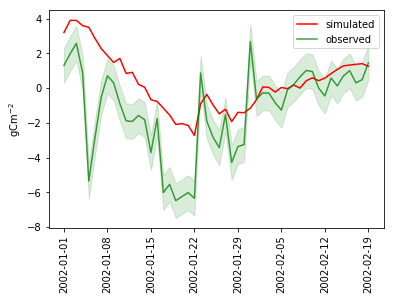

In [3]:
import matplotlib.pyplot as plt 
import pandas as pd 
%matplotlib inline 

DF = pd.DataFrame()
DF['obs'] = obs
DF['sim'] = sim
DF.index = pd.date_range('2002-01-01', periods = len(DF), freq='D')

plt.plot(DF.sim,c='red',label='simulated')
plt.plot(DF.obs,c='green',label='observed',alpha=0.75)
plt.fill_between(DF.index, DF.obs + 1 , DF.obs - 1 , 
                color='green', alpha=0.15)
plt.ylabel('gCm$^{-2}$')
plt.xticks(rotation=90)
plt.legend(loc='best')


You can right click on the figure above to save it.

Call the compare_daily() function specifying that the uncertainty is provided as a quantity (i.e. "qt") and is equal to 1 gCm-2 for all the observed data points. The value returned expresses the fraction of modelled data points that were within a +/- 1 gCm-2 range around the observed data points.

In [4]:
print (compare_daily(sim,obs,'qt',1))

0.36


The fraction of modelled data points that were within a +/- 1 gCm-2 range around the observed data points when considering a +/- 3 days/timesteps window can be returned by calling compare() instead of compare_daily(). The time lag window can be reduced or increased by editing lines 28-46 of the compare() and lines 65-83 of the compare_daily() functions. 

In [6]:
compare(sim,obs,'qt',1)

0.5

The lines below repeat the two function calls performed just above this time using a percentage ("pc") instead of a quantity ("qt") in order to express observational uncertainty. Both with and without time-lag consideration the observational uncertainty is set equal to 25% of the observed value (i.e. 0.25 expressed as a fraction).

In [6]:
print (compare_daily(sim, obs, 'pc', 0.25)) # no consideration of timelag

0.08


In [7]:
print (compare(sim, obs, 'pc', 0.25)) # +/- 3 days timelag considered

0.32


You can repeat all the above comparisons using your own data by saving them as a .csv using "sim" as a header for the simulated data and "obs" as a header for the measured data and then running the lines below to load the file. Make sure you change the "/Users/vm/Desktop/laiDF.csv" into the location of your .csv

In [8]:
DF = pd.read_csv("/Users/vm/Desktop/gcel tutorial/neeDF.csv") # will load your data and store them as a dataframe called DF

IOError: [Errno 2] File /Users/vm/Desktop/gcel tutorial/neeDF.csv does not exist: '/Users/vm/Desktop/gcel tutorial/neeDF.csv'

In [ ]:
DF.sim # will print your modelled data

In [ ]:
DF.obs # will print your observed data 

You can add a date index to your dataframe (i.e. DF) so that you have temporal information related to your data points. In the lines below a daily date index, with starting date being 2002-01-01, is added. The obs and sim data are then ploted.

In [ ]:
DF.index = pd.date_range('2002-01-01', periods = len(DF), freq='D')

# plot sim and obs data
plt.plot(DF.sim,c='red',label='simulated')
plt.plot(DF.obs,c='green',label='observed',alpha=0.5)
plt.ylabel('gCm$^{-2}$')
plt.title('NEE')
plt.xticks(rotation=90)
plt.legend()


In [ ]:
print(compare_daily(DF.sim, DF.obs, 'pc', 0.25)) # compare obs and sim without considering +/- 3 days timelag

In [ ]:
print(compare(DF.sim, DF.obs, 'pc', 0.25)) # compare obs and sim while considering +/- 3 days timelag

In [ ]:
print ("2002 : " + str(compare(DF.sim['2002'], DF.obs['2002'], 'pc', 0.25)))
print ("2003 : " + str(compare(DF.sim['2003'], DF.obs['2003'], 'pc', 0.25)))
print ("2004 : " + str(compare(DF.sim['2004'], DF.obs['2004'], 'pc', 0.25)))
print ("2005 : " + str(compare(DF.sim['2005'], DF.obs['2005'], 'pc', 0.25)))
print ("2006 : " + str(compare(DF.sim['2006'], DF.obs['2006'], 'pc', 0.25)))
print ("2007 : " + str(compare(DF.sim['2007'], DF.obs['2007'], 'pc', 0.25)))
print ("2008 : " + str(compare(DF.sim['2008'], DF.obs['2008'], 'pc', 0.25)))
print ("2009 : " + str(compare(DF.sim['2009'], DF.obs['2009'], 'pc', 0.25)))

In [ ]:
DF = DF.resample('W').mean()
print ("2002 : " + str(compare(DF.sim['2002'], DF.obs['2002'], 'pc', 0.25)))
print ("2003 : " + str(compare(DF.sim['2003'], DF.obs['2003'], 'pc', 0.25)))
print ("2004 : " + str(compare(DF.sim['2004'], DF.obs['2004'], 'pc', 0.25)))
print ("2005 : " + str(compare(DF.sim['2005'], DF.obs['2005'], 'pc', 0.25)))
print ("2006 : " + str(compare(DF.sim['2006'], DF.obs['2006'], 'pc', 0.25)))
print ("2007 : " + str(compare(DF.sim['2007'], DF.obs['2007'], 'pc', 0.25)))
print ("2008 : " + str(compare(DF.sim['2008'], DF.obs['2008'], 'pc', 0.25)))
print ("2009 : " + str(compare(DF.sim['2009'], DF.obs['2009'], 'pc', 0.25)))

In [ ]:
DF = DF.resample('W').mean()
print ("2002 : " + str(compare(DF.sim['2002'], DF.obs['2002'], 'qt', 1)))
print ("2003 : " + str(compare(DF.sim['2003'], DF.obs['2003'], 'qt', 1)))
print ("2004 : " + str(compare(DF.sim['2004'], DF.obs['2004'], 'qt', 1)))
print ("2005 : " + str(compare(DF.sim['2005'], DF.obs['2005'], 'qt', 1)))
print ("2006 : " + str(compare(DF.sim['2006'], DF.obs['2006'], 'qt', 1)))
print ("2007 : " + str(compare(DF.sim['2007'], DF.obs['2007'], 'qt', 1)))
print ("2008 : " + str(compare(DF.sim['2008'], DF.obs['2008'], 'qt', 1)))
print ("2009 : " + str(compare(DF.sim['2009'], DF.obs['2009'], 'qt', 1)))